# SGD: convex loss functions
- `SGDClassifier`가 지원하는 다양한 convex 손실 함수를 비교하는 그림

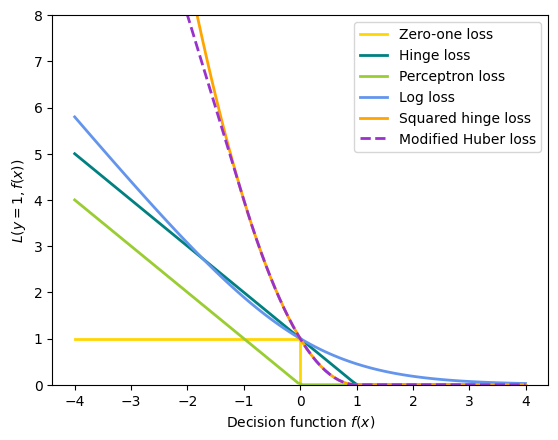

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.0] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color="gold", lw=lw, label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color="teal", lw=lw, label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color="yellowgreen", lw=lw, label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color="cornflowerblue", lw=lw, label="Log loss")
plt.plot(
    xx,
    np.where(xx < 1, 1 - xx, 0) ** 2,
    color="orange",
    lw=lw,
    label="Squared hinge loss",
)
plt.plot(
    xx,
    modified_huber_loss(xx, 1),
    color="darkorchid",
    lw=lw,
    linestyle="--",
    label="Modified Huber loss",
)
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()